# Concrete Strength Prediction

### Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Attribute Information
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

1.	Cement (cement), quantitative, kg in a m3 mixture, Input Variable
2.	Blast Furnace Slag (slag), quantitative, kg in a m3 mixture, Input Variable
3.	Fly Ash (ash), quantitative, kg in a m3 mixture, Input Variable
4.	Water(water), quantitative, kg in a m3 mixture, Input Variable
5.	Superplasticizer (superplastic), quantitative, kg in a m3 mixture, Input Variable
6.	Coarse Aggregate (coarseagg), quantitative, kg in a m3 mixture, Input Variable
7.	Fine Aggregate (fineagg), quantitative, kg in a m3 mixture, Input Variable
8.	Age(age), quantitative, Day (1~365), Input Variable
9.	Concrete compressive strength(strength), quantitative, MPa, Output Variable

In [2]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Import data
data = pd.read_csv('concrete.csv')

### 1. Univariate analysis
–data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates **(10 Marks)**

In [5]:
#Peak at the data
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [1]:
#Check datatypes
data.info()

NameError: name 'data' is not defined

In [6]:
#Get some basic information on the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [7]:
#Number of rows and columns
data.shape

(1030, 9)

In [8]:
#Check if there are any null values
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
#Show the count of unique values in each column
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [6]:
#Getting the value counts of the age to determine if the data is invalid
data["age"].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

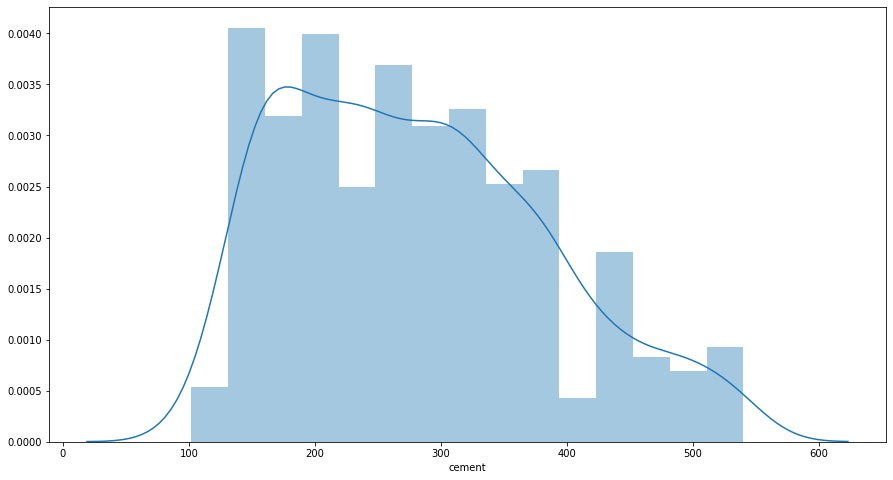

In [20]:
#Plotting the cement range of data
plt.figure(figsize=(15,8))
sns.distplot(data['cement'])
plt.show()

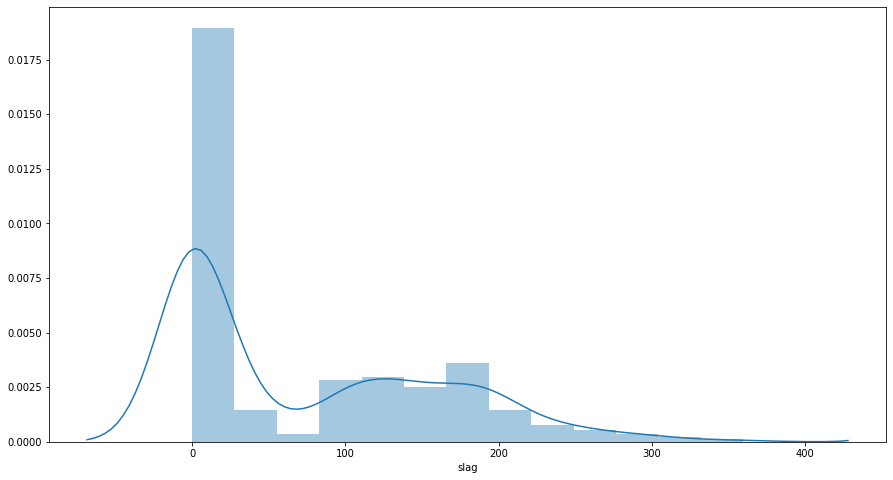

In [21]:
#Plotting the blast furnace slag range of data
plt.figure(figsize=(15,8))
sns.distplot(data['slag'])
plt.show()

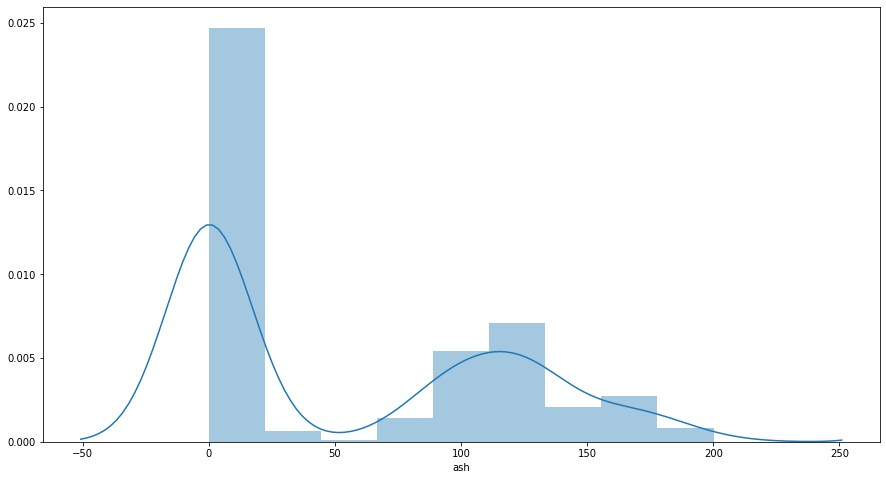

In [22]:
#Plotting the fly ash range of data
plt.figure(figsize=(15,8))
sns.distplot(data['ash'])
plt.show()

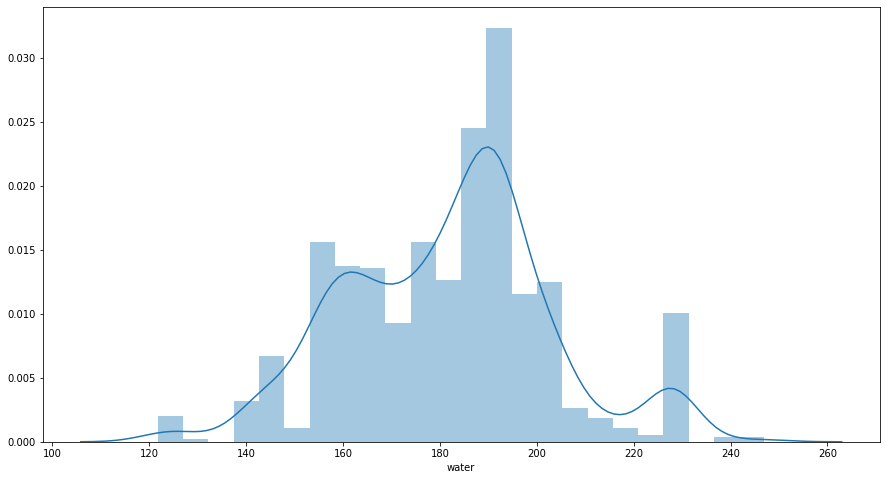

In [23]:
#Plotting the water range of data
plt.figure(figsize=(15,8))
sns.distplot(data['water'])
plt.show()

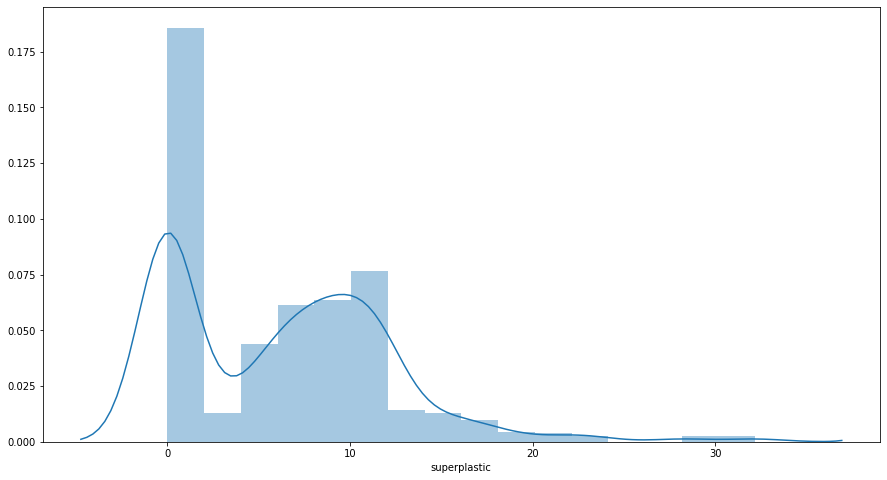

In [24]:
#Plotting the superplasticizer range of data
plt.figure(figsize=(15,8))
sns.distplot(data['superplastic'])
plt.show()

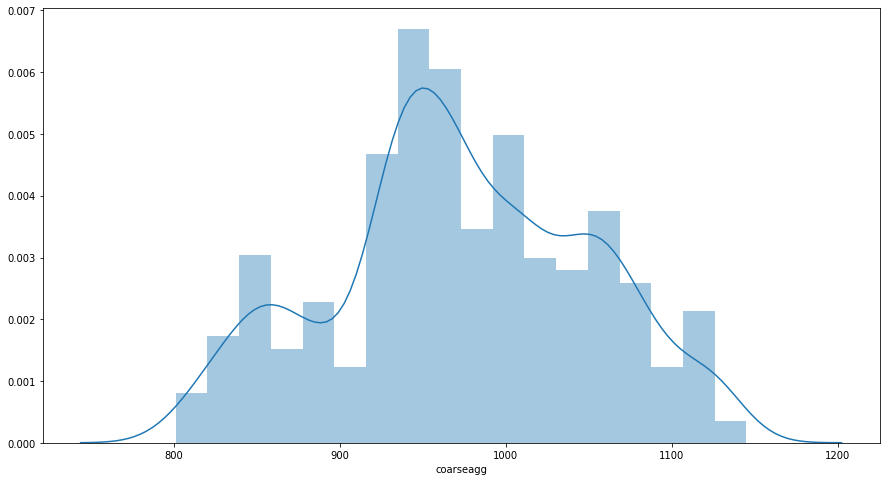

In [25]:
#Plotting the coarse aggregate range of data
plt.figure(figsize=(15,8))
sns.distplot(data['coarseagg'])
plt.show()

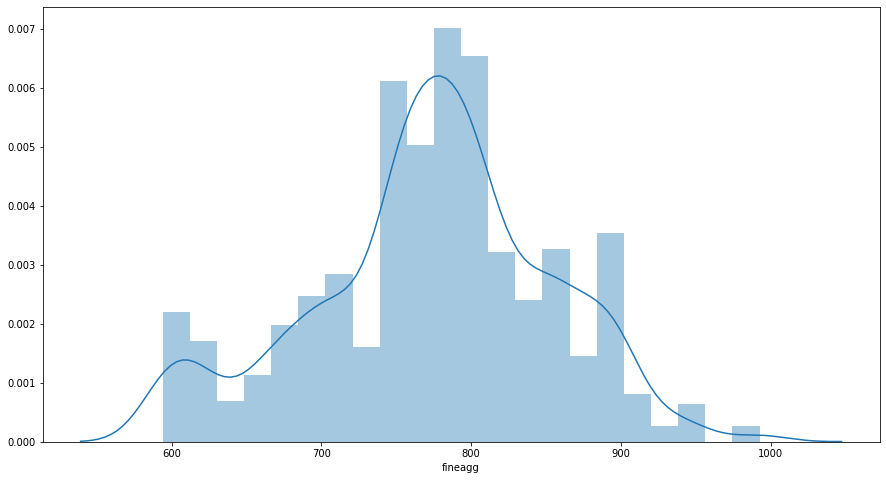

In [26]:
#Plotting the fine aggregate range of data
plt.figure(figsize=(15,8))
sns.distplot(data["fineagg"])
plt.show()

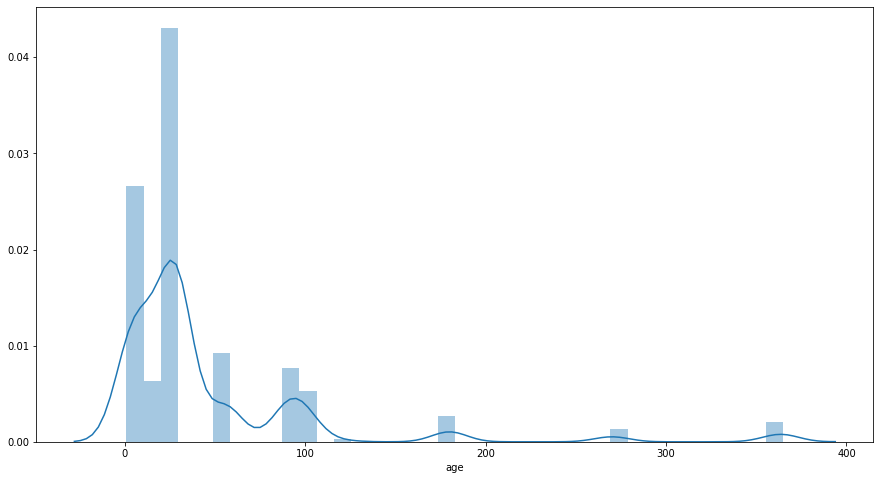

In [8]:
#Plotting the age range of data
plt.figure(figsize=(15,8))
sns.distplot(data['age'])
plt.show()

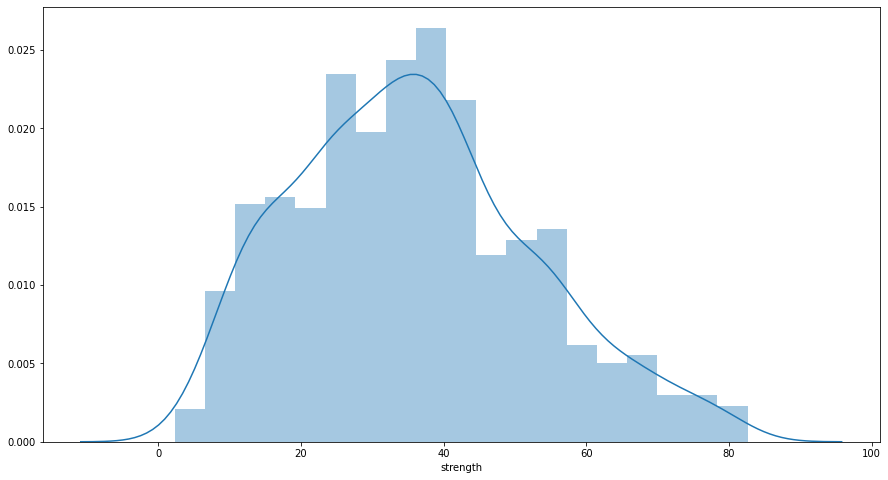

In [27]:
#Plotting the concrete compressive strength range of data
plt.figure(figsize=(15,8))
sns.distplot(data['strength'])
plt.show()

### 2. Bi-variate analysis
between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. **(10 marks)**

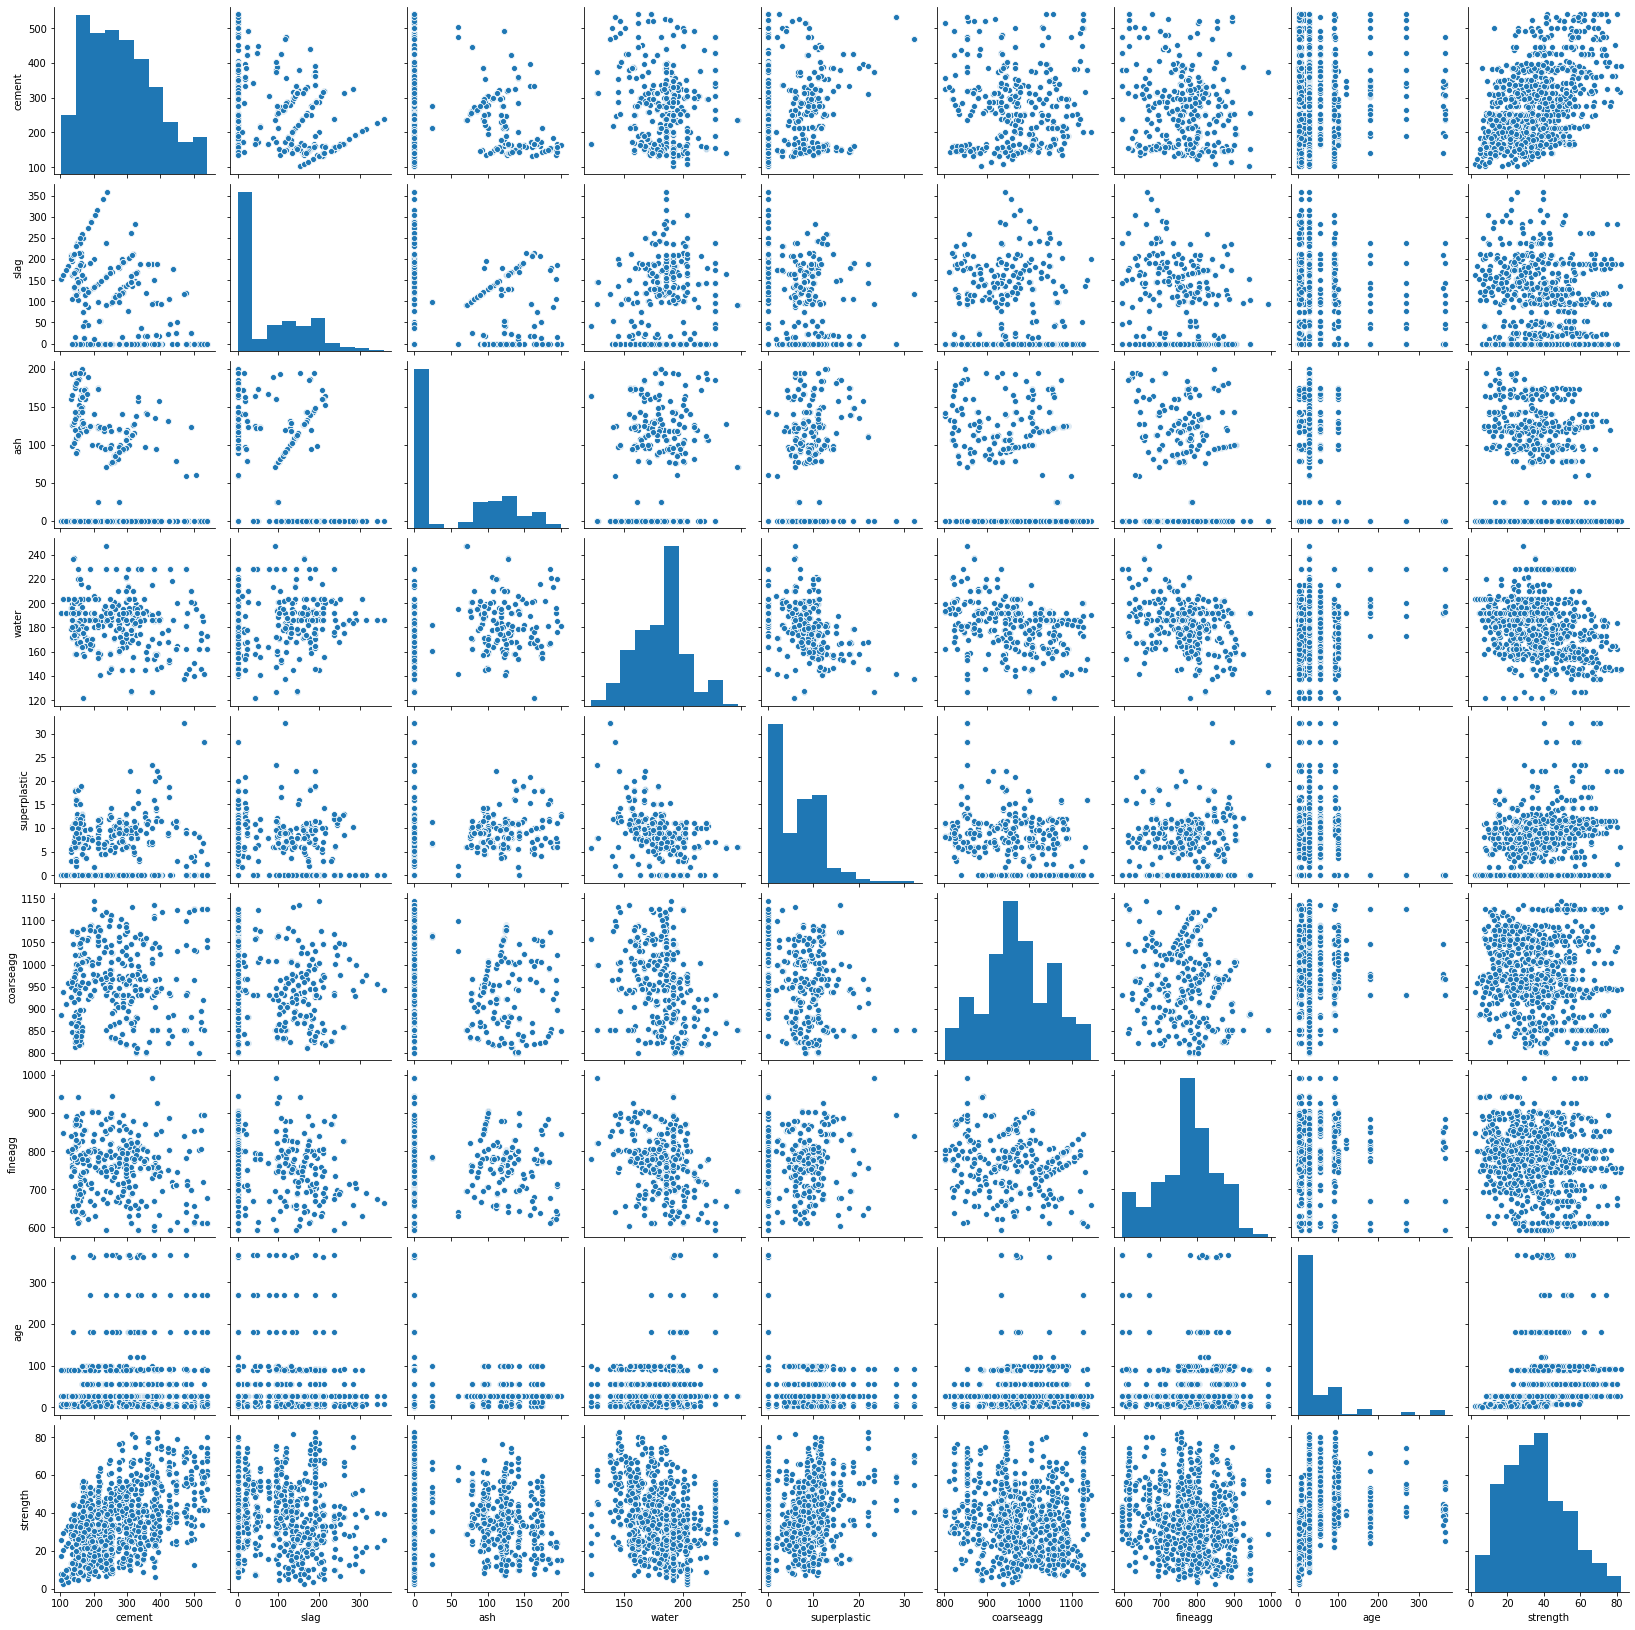

In [70]:
#Getting a visual of all of the data to see how values may be coorelated
sns.pairplot(data);

**Insights:** `It looks like cement is the only variable with the most correlation to strength on its own. A combination of variables may affect strength more.`

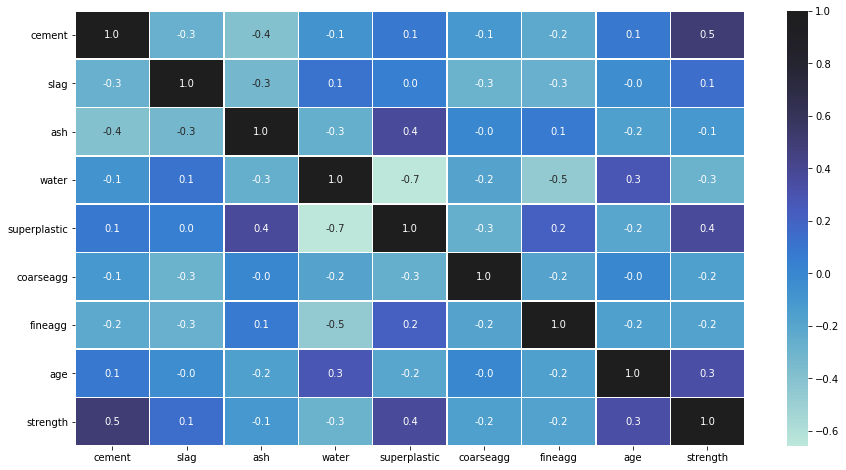

In [40]:
# Heatmap of all data
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1)
plt.show()

**Insights:** `In the heatmap we can see that Superplasticizer and age may have a decent correlation with the strength as well.`

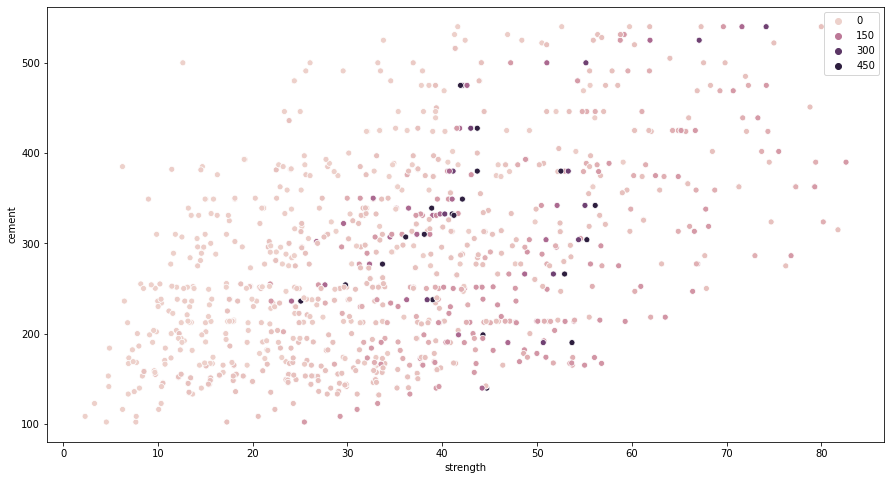

In [52]:
#Checking the correlation between cement and strength while also taking note of the age range of these
agevalue = data['age'].values

figure = plt.figure(figsize=(15,8))
sns.scatterplot(x = data['strength'], y= data['cement'], data=data, hue=agevalue)
plt.show()

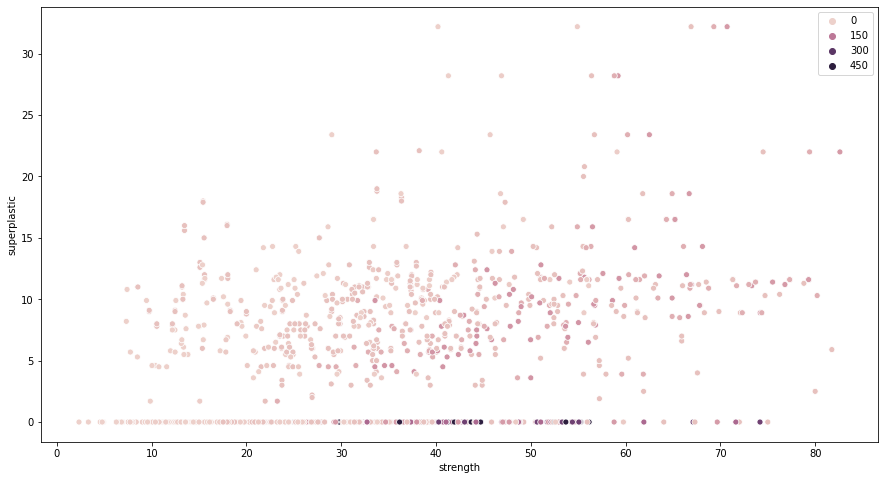

In [53]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x = data['strength'], y= data['superplastic'], data=data, hue=agevalue)
plt.show()

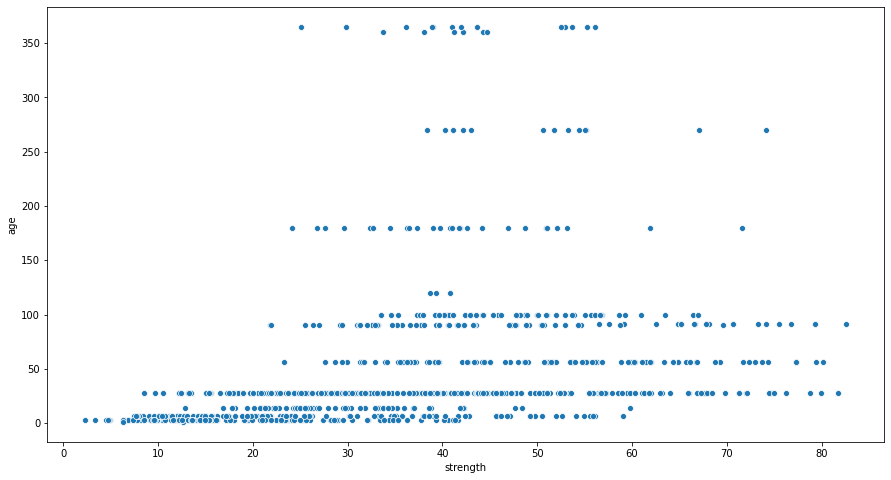

In [54]:
# Showing up close correlation with age
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x = data['strength'], y= data['age'], data=data)
plt.show()

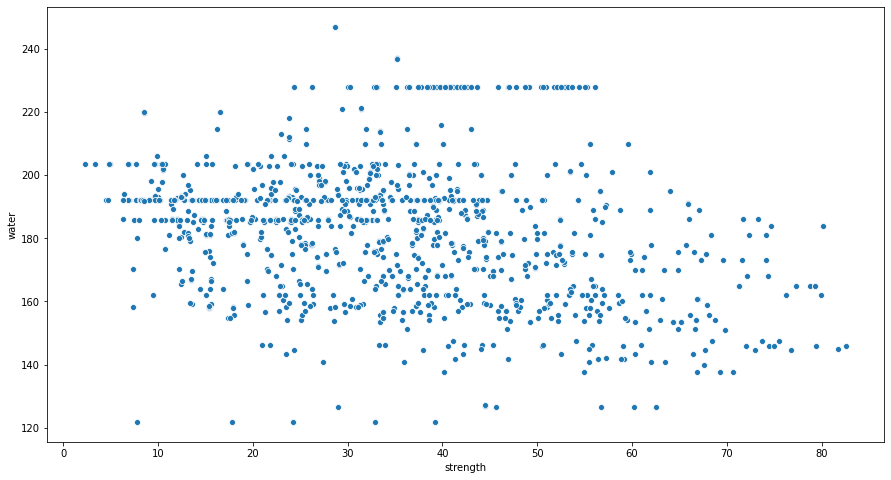

In [57]:
# Showing up close correlation with water
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x = data['strength'], y= data['water'], data=data)
plt.show()

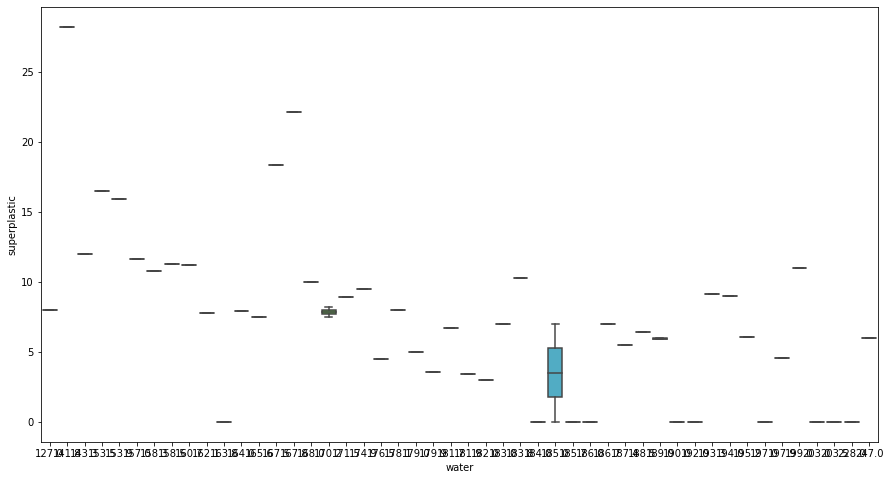

In [69]:
# Looking at the correlation between water and superplastic since there is a strong negative correlation. 
# The box plot is difficult to read.

figure = plt.figure(figsize=(15,8))
sns.boxplot(data['water'].head(70), data['superplastic'].head(70));
plt.show()

###  3. Feature Engineering techniques **(10 marks)**
1. Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.
2. Get the data model ready and do a train test split.
3. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.

In [76]:
# Lets check for highly correlated variables
cor= data.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Series([], dtype: float64)

In [103]:
# Dropping Superplasticizer since it's highly correlated with Water
ft_data = data.drop("superplastic", axis = 1)
ft_data

,cement,slag,ash,water,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,"1,047.40",696.70,28,18.29
...,...,...,...,...,...,...,...,...
1025,135.00,0.00,166.00,180.00,961.00,805.00,28,13.29
1026,531.30,0.00,0.00,141.80,852.10,893.70,3,41.30
1027,276.40,116.00,90.30,179.60,870.10,768.30,28,44.28
1028,342.00,38.00,0.00,228.00,932.00,670.00,270,55.06


In [115]:
# Spitting the data into train, test, split
from sklearn.model_selection import train_test_split

y = ft_data['strength']
X = ft_data.loc[:, ft_data.columns != 'strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=seed,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 7), (309, 7), (721,), (309,))

### 4. Creating the Model and Tuning It
1. Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithm have to be there). **(15 marks)**
2. Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. **(15 marks)**

In [125]:
seed=12

#### Decision Tree

In [126]:
#Building the model
from sklearn.tree import DecisionTreeRegressor
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

dTree = DecisionTreeRegressor(random_state=seed)
dTree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [117]:
#Making a prediction on the target variable
y_predict = dTree.predict(X_test)

In [124]:
#Check model performance
#Decision Tree score
print('Training accuracy: ', dTree.score(X_train,y_train))  
print('Testing accuracy: ', dTree.score(X_test, y_test))

Training accuracy:  0.9939707367830339
Testing accuracy:  0.8651328244789994


In [149]:
#K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)

dTree_results = cross_val_score(dTree,X, y, cv=kfold)

print("Mean for K-fold results:", np.mean(abs(dTree_results)))
print("Standard Deviation for K-fold results:", dTree_results.std())

Mean for K-fold results: 0.8652299728111743
Standard Deviation for K-fold results: 0.044121061330370026


In [134]:
#Improve model
dTreeR = DecisionTreeRegressor(max_depth = 3, random_state=seed)
dTreeR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [135]:
#Check model performance
#Decision Tree score
print('Training accuracy: ', dTreeR.score(X_train,y_train))  
print('Testing accuracy: ', dTreeR.score(X_test, y_test))

Training accuracy:  0.6270096351330583
Testing accuracy:  0.6145135548764896


In [148]:
#K-fold cross validation
dTreeR_results = cross_val_score(dTreeR,X, y, cv=kfold)

print("Mean for K-fold results:", np.mean(abs(dTreeR_results)))
print("Standard Deviation for K-fold results:", dTreeR_results.std())

Mean for K-fold results: 0.6004794461424934
Standard Deviation for K-fold results: 0.06644179271761676


#### Random Forest

In [150]:
#Build RF Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=2,n_estimators=500,random_state=seed)
rfm=rf.fit(X_train, y_train)

In [151]:
#Check model performance
print('Training accuracy: ', rfm.score(X_train,y_train))  
print('Testing accuracy: ', rfm.score(X_test, y_test))

Training accuracy:  0.9818918363086169
Testing accuracy:  0.9160931438222988


In [152]:
#K-fold cross validation

rfm_results = cross_val_score(rfm,X, y, cv=kfold)
print("Mean for K-fold results:", np.mean(abs(rfm_results)))
print("Standard Deviation for K-fold results:", rfm_results.std())

Mean for K-fold results: 0.9169909202614421
Standard Deviation for K-fold results: 0.024319016152385645


In [157]:
#Grid Search
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   10.4s finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [159]:
#Improve model
rf2 = RandomForestRegressor(bootstrap=True, max_depth=50, max_features='auto', min_samples_leaf=1, 
                            n_jobs=2,n_estimators=100,random_state=seed)
rfm2=rf2.fit(X_train, y_train)

In [160]:
#Check new model performance
print('Training accuracy: ', rfm2.score(X_train,y_train))  
print('Testing accuracy: ', rfm2.score(X_test, y_test))

Training accuracy:  0.9814735852860729
Testing accuracy:  0.914478808785101


In [169]:
#K-fold cross validation

rfm2_results = cross_val_score(rfm2,X, y, cv=kfold)
print("Mean for K-fold results:", np.mean(abs(rfm2_results)))
print("Standard Deviation for K-fold results:", rfm2_results.std())

Mean for K-fold results: 0.9149722450609106
Standard Deviation for K-fold results: 0.024678955518908436


#### AdaBoost

In [153]:
#Build AdaBoost model
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=10, random_state=seed)
ada = ada.fit(X_train, y_train)

In [154]:
#Check model performance
print('Training accuracy: ', ada.score(X_train,y_train))  
print('Testing accuracy: ', ada.score(X_test, y_test))

Training accuracy:  0.7358837805661516
Testing accuracy:  0.7165376876149301


In [155]:
#K-fold cross validation

ada_results = cross_val_score(ada,X, y, cv=kfold)
ada_results
print("Mean for K-fold results:", np.mean(abs(ada_results)))
print("Standard Deviation for K-fold results:", ada_results.std())

Mean for K-fold results: 0.7394714852627706
Standard Deviation for K-fold results: 0.03119517934760938


In [164]:
#Grid Search
ada_params = {'n_estimators': [50, 100], 
                   'learning_rate': [0.01, 0.05, 0.1, 0.5], 
                   'loss': ['linear', 'square', 'exponential']
             }
clf2 = GridSearchCV(AdaBoostRegressor(), ada_params, cv = 5, verbose = 2, n_jobs= 4)
clf2.fit(X, y)

clf2.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    3.8s finished


{'learning_rate': 0.5, 'loss': 'square', 'n_estimators': 100}

In [165]:
#Improve model
ada2 = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=100, random_state=seed)
ada2 = ada2.fit(X_train, y_train)

In [167]:
#Check new model performance
print('Training accuracy: ', ada2.score(X_train,y_train))  
print('Testing accuracy: ', ada2.score(X_test, y_test))

Training accuracy:  0.829554471884779
Testing accuracy:  0.8029378318714357


In [170]:
#K-fold cross validation

ada2_results = cross_val_score(ada2,X, y, cv=kfold)
ada2_results
print("Mean for K-fold results:", np.mean(abs(ada2_results)))
print("Standard Deviation for K-fold results:", ada2_results.std())

Mean for K-fold results: 0.782500382135862
Standard Deviation for K-fold results: 0.02997023421839451


#### Model Comparison

In [173]:
#Dataframe
comp = pd.DataFrame(np.array([[dTree.score(X_train,y_train), dTree.score(X_test, y_test),
                               np.mean(abs(dTree_results)), dTree_results.std()],
                             [dTreeR.score(X_train,y_train), dTreeR.score(X_test, y_test),
                              np.mean(abs(dTreeR_results)),dTreeR_results.std()],
                              [rfm.score(X_train,y_train), rfm.score(X_test, y_test), np.mean(abs(rfm_results)), rfm_results.std()],
                              [rfm2.score(X_train,y_train),rfm2.score(X_test, y_test),np.mean(abs(rfm2_results)),rfm2_results.std()],
                              [ada.score(X_train,y_train),ada.score(X_test, y_test),np.mean(abs(ada_results)),ada_results.std()],
                              [ada2.score(X_train,y_train),ada2.score(X_test, y_test),np.mean(abs(ada2_results)),ada2_results.std()]]),
                    columns=['train_acc', 'test_acc', 'kfold_mean', 'kfold_std'],
                    index=['dTree', 'dTreeR', 'rfm', 'rfm2', 'ada', 'ada2'])
comp

,train_acc,test_acc,kfold_mean,kfold_std
dTree,0.99,0.87,0.87,0.04
dTreeR,0.63,0.61,0.60,0.07
rfm,0.98,0.92,0.92,0.02
rfm2,0.98,0.91,0.91,0.02
ada,0.74,0.72,0.74,0.03
ada2,0.83,0.80,0.78,0.03
